## Process Yellowstone Data:

Now that the yellowstone mth5 has been created we can process the data with aurora

In [1]:
# Required imports for the program. 
import numpy as np
from pathlib import Path
import pandas as pd
import warnings

from mth5.clients.make_mth5 import MakeMTH5
from mth5 import mth5, timeseries
from mth5.utils.helpers import initialize_mth5
from mt_metadata.utils.mttime import get_now_utc, MTime
from aurora.config import BANDS_DEFAULT_FILE
from aurora.config.config_creator import ConfigCreator
from aurora.pipelines.process_mth5 import process_mth5
from mtpy.processing import RunSummary, KernelDataset

warnings.filterwarnings('ignore')

## Set up the path to the file

The mth5 file is created via the example in notebooks/mth5

For now you can manually move the data here and then
mth5_path = Path(EM_WYYS2_MTF20_WYYS3_MTC20.h5")

Or you can path to the explicit location like this:
mth5_path = Path("/home/kkappler/software/irismt/mt_examples/notebooks/mth5").joinpath("EM_WYYS2_MTF20_WYYS3_MTC20.h5")

or you can use a symlink, or the inspect module

In this example I try using a relative path:

In [2]:
here = Path(".")
# data_dir = here.joinpath("../../data/time_series")
data_dir = here.joinpath("../mth5")
mth5_path = data_dir.joinpath("4P_WYYS2_MTF20_WYYS3_MTC20.h5")
print(mth5_path.stat())
mth5_path.exists()

os.stat_result(st_mode=33188, st_ino=3091072182783243007, st_dev=98, st_nlink=1, st_uid=1000, st_gid=1000, st_size=203246183, st_atime=1726803947, st_mtime=1726804156, st_ctime=1726804156)


True

In [3]:
# Uncomment below for path troubleshooting

# list(data_dir.glob("*"))

## Initialize the mth5 and take a look at contents

In [4]:
from mth5.mth5 import MTH5

In [5]:
m = MTH5(mth5_path)

In [6]:
m.open_mth5()

/:
    |- Group: Experiment
    --------------------
        |- Group: Reports
        -----------------
        |- Group: Standards
        -------------------
            --> Dataset: summary
            ......................
        |- Group: Surveys
        -----------------
            |- Group: 4P
            ------------
                |- Group: Filters
                -----------------
                    |- Group: coefficient
                    ---------------------
                        |- Group: electric_analog_to_digital
                        ------------------------------------
                        |- Group: electric_dipole_100.000
                        ---------------------------------
                        |- Group: electric_si_units
                        ---------------------------
                        |- Group: magnetic_analog_to_digital
                        ------------------------------------
                    |- Group: fap
                   

In [7]:
m.close_mth5()

24:09:19T20:49:24 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing ../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5


In [8]:
mth5_object = initialize_mth5(mth5_path, file_version="0.2.0")

In [9]:
# Print some info about the mth5 
mth5_filename = mth5_object.filename
version = mth5_object.file_version
print(f" Filename: {mth5_filename} \n Version: {version}")

 Filename: ../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5 
 Version: 0.2.0


In [10]:
mth5_object.channel_summary.clear_table()
channel_summary = mth5_object.channel_summary.summarize()
channel_summary_df = mth5_object.channel_summary.to_dataframe()

In [11]:
channel_summary_df

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,has_data,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,4P,MTC20,a,47.7552,-108.000,833.447772,ex,2009-08-22 23:54:15+00:00,2009-08-23 01:04:36+00:00,4222,1.0,electric,11.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,4P,MTC20,a,47.7552,-108.000,833.447772,ey,2009-08-22 23:54:15+00:00,2009-08-23 01:04:36+00:00,4222,1.0,electric,101.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,4P,MTC20,a,47.7552,-108.000,833.447772,hx,2009-08-22 23:54:15+00:00,2009-08-23 01:04:36+00:00,4222,1.0,magnetic,11.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,4P,MTC20,a,47.7552,-108.000,833.447772,hy,2009-08-22 23:54:15+00:00,2009-08-23 01:04:36+00:00,4222,1.0,magnetic,101.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,4P,MTC20,a,47.7552,-108.000,833.447772,hz,2009-08-22 23:54:15+00:00,2009-08-23 01:04:36+00:00,4222,1.0,magnetic,0.0,90.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Transportable_Array,WYYS3,WYYS3d,44.5607,-110.315,2387.725000,ex,2009-08-28 18:24:55+00:00,2009-09-17 20:04:21+00:00,1,0.0,electric,13.4,0.0,none,False,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
76,Transportable_Array,WYYS3,WYYS3d,44.5607,-110.315,2387.725000,ey,2009-08-28 18:24:55+00:00,2009-09-17 20:04:21+00:00,1,0.0,electric,103.4,0.0,none,False,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
77,Transportable_Array,WYYS3,WYYS3d,44.5607,-110.315,2387.725000,hx,2009-08-28 18:24:55+00:00,2009-09-17 20:04:21+00:00,1,0.0,magnetic,13.4,0.0,none,False,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
78,Transportable_Array,WYYS3,WYYS3d,44.5607,-110.315,2387.725000,hy,2009-08-28 18:24:55+00:00,2009-09-17 20:04:21+00:00,1,0.0,magnetic,103.4,0.0,none,False,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


## To see the entire channel summary pretty printed use this:

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(channel_summary_df)

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,has_data,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,4P,MTC20,a,47.75520,-108.000,833.447772,ex,2009-08-22 23:54:15+00:00,2009-08-23 01:04:36+00:00,4222,1.0,electric,11.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,4P,MTC20,a,47.75520,-108.000,833.447772,ey,2009-08-22 23:54:15+00:00,2009-08-23 01:04:36+00:00,4222,1.0,electric,101.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,4P,MTC20,a,47.75520,-108.000,833.447772,hx,2009-08-22 23:54:15+00:00,2009-08-23 01:04:36+00:00,4222,1.0,magnetic,11.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,4P,MTC20,a,47.75520,-108.000,833.447772,hy,2009-08-22 23:54:15+00:00,2009-08-23 01:04:36+00:00,4222,1.0,magnetic,101.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,4P,MTC20,a,47.75520,-108.000,833.447772,hz,2009-08-22 23:54:15+00:00,2009-08-23 01:04:36+00:00,4222,1.0,magnetic,0.0,90.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
5,4P,MTC20,b,47.75520,-108.000,833.447772,ex,2009-08-23 01:33:26+00:00,2009-09-01 18:50:07+00:00,839802,1.0,electric,11.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
6,4P,MTC20,b,47.75520,-108.000,833.447772,ey,2009-08-23 01:33:26+00:00,2009-09-01 18:50:07+00:00,839802,1.0,electric,101.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
7,4P,MTC20,b,47.75520,-108.000,833.447772,hx,2009-08-23 01:33:26+00:00,2009-09-01 18:50:07+00:00,839802,1.0,magnetic,11.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
8,4P,MTC20,b,47.75520,-108.000,833.447772,hy,2009-08-23 01:33:26+00:00,2009-09-01 18:50:07+00:00,839802,1.0,magnetic,101.8,0.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
9,4P,MTC20,b,47.75520,-108.000,833.447772,hz,2009-08-23 01:33:26+00:00,2009-09-01 18:50:07+00:00,839802,1.0,magnetic,0.0,90.0,digital counts,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


##  Compress the Channel Summary to a RunSummary

In [13]:
mth5_run_summary = RunSummary()
mth5_run_summary.from_mth5s([mth5_path,])
run_summary = mth5_run_summary.clone()


24:09:19T20:49:26 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing ../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5


Now we have a dataframe of the available runs to process from the MTH5 

In [14]:
run_summary.df

,channel_scale_factors,duration,end,has_data,input_channels,mth5_path,n_samples,output_channels,run,sample_rate,start,station,survey,run_hdf5_reference,station_hdf5_reference
0,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",4221.0,2009-08-23 01:04:36+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,4222,"[ex, ey, hz]",a,1.0,2009-08-22 23:54:15+00:00,MTC20,4P,<HDF5 object reference>,<HDF5 object reference>
1,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",839801.0,2009-09-01 18:50:07+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,839802,"[ex, ey, hz]",b,1.0,2009-08-23 01:33:26+00:00,MTC20,4P,<HDF5 object reference>,<HDF5 object reference>
2,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",967984.0,2009-09-13 00:00:00+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,967985,"[ex, ey, hz]",c,1.0,2009-09-01 19:06:56+00:00,MTC20,4P,<HDF5 object reference>,<HDF5 object reference>
3,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",7539.0,2009-07-04 00:43:52+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,7540,"[ex, ey, hz]",a,1.0,2009-07-03 22:38:13+00:00,MTF20,4P,<HDF5 object reference>,<HDF5 object reference>
4,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",2400660.0,2009-07-31 19:39:01+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,2400661,"[ex, ey, hz]",b,1.0,2009-07-04 00:48:01+00:00,MTF20,4P,<HDF5 object reference>,<HDF5 object reference>
5,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",1048353.0,2009-08-13 00:00:00+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,1048354,"[ex, ey, hz]",c,1.0,2009-07-31 20:47:27+00:00,MTF20,4P,<HDF5 object reference>,<HDF5 object reference>
6,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",2833.0,2009-07-15 23:30:41+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,2834,"[ex, ey, hz]",a,1.0,2009-07-15 22:43:28+00:00,WYYS2,4P,<HDF5 object reference>,<HDF5 object reference>
7,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",1798232.0,2009-08-05 19:09:39+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,1798233,"[ex, ey, hz]",b,1.0,2009-07-15 23:39:07+00:00,WYYS2,4P,<HDF5 object reference>,<HDF5 object reference>
8,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",1225635.0,2009-08-20 00:17:06+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,1225636,"[ex, ey, hz]",c,1.0,2009-08-05 19:49:51+00:00,WYYS2,4P,<HDF5 object reference>,<HDF5 object reference>
9,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",746884.0,2009-08-28 17:23:45+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,746885,"[ex, ey, hz]",c,1.0,2009-08-20 01:55:41+00:00,WYYS3,4P,<HDF5 object reference>,<HDF5 object reference>


### Here are the columns available in the run summary

In [15]:
run_summary.df.columns

Index(['channel_scale_factors', 'duration', 'end', 'has_data',
       'input_channels', 'mth5_path', 'n_samples', 'output_channels', 'run',
       'sample_rate', 'start', 'station', 'survey', 'run_hdf5_reference',
       'station_hdf5_reference'],
      dtype='object')

### Here are the columns to look at to get a sense of the data coverage

Sometimes we just want to look at the survey, station, run, and time intervals
we can for that we can call mini_summary


In [16]:
run_summary.mini_summary

,survey,station,run,start,end,duration
0,4P,MTC20,a,2009-08-22 23:54:15+00:00,2009-08-23 01:04:36+00:00,4221.0
1,4P,MTC20,b,2009-08-23 01:33:26+00:00,2009-09-01 18:50:07+00:00,839801.0
2,4P,MTC20,c,2009-09-01 19:06:56+00:00,2009-09-13 00:00:00+00:00,967984.0
3,4P,MTF20,a,2009-07-03 22:38:13+00:00,2009-07-04 00:43:52+00:00,7539.0
4,4P,MTF20,b,2009-07-04 00:48:01+00:00,2009-07-31 19:39:01+00:00,2400660.0
5,4P,MTF20,c,2009-07-31 20:47:27+00:00,2009-08-13 00:00:00+00:00,1048353.0
6,4P,WYYS2,a,2009-07-15 22:43:28+00:00,2009-07-15 23:30:41+00:00,2833.0
7,4P,WYYS2,b,2009-07-15 23:39:07+00:00,2009-08-05 19:09:39+00:00,1798232.0
8,4P,WYYS2,c,2009-08-05 19:49:51+00:00,2009-08-20 00:17:06+00:00,1225635.0
9,4P,WYYS3,c,2009-08-20 01:55:41+00:00,2009-08-28 17:23:45+00:00,746884.0


## Kernel Dataset

This is like a run summary, but for a single station or a pair of stations.
It is used to specify the inputs to aurora processing.

It takes a run_summary and a station name, and optionally, a remote reference station name

It is made _based on the available data_.

Syntax is kernel_dataset.from_run_summary(run_summary, local_station_id, reference_station_id)

Here is an example of making a kernel dataset for a single station:

In [17]:
local_station_id = "WYYS2"

In [18]:
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id)
kernel_dataset.mini_summary

24:09:19T20:49:26 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column fc, adding and setting dtype to <class 'bool'>.
24:09:19T20:49:26 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column remote, adding and setting dtype to <class 'bool'>.
24:09:19T20:49:26 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column run_dataarray, adding and setting dtype to <class 'object'>.
24:09:19T20:49:26 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column stft, adding and setting dtype to <class 'object'>.
24:09:19T20:49:26 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column mth5_obj, adding and setting dtype to <class 'object'>.


,survey,station,run,start,end,duration
0,4P,WYYS2,a,2009-07-15 22:43:28+00:00,2009-07-15 23:30:41+00:00,2833.0
1,4P,WYYS2,b,2009-07-15 23:39:07+00:00,2009-08-05 19:09:39+00:00,1798232.0
2,4P,WYYS2,c,2009-08-05 19:49:51+00:00,2009-08-20 00:17:06+00:00,1225635.0


## Drop short runs before processing

This also may get moved into kernel_dataset tools and parameters in future.  For example, the processing config
could have a "_minimum run duration_" argument, but this will in general be based on the data sample rate.

For now we apply the dropping of runs manually

In [19]:
mimimum_run_duration= 3600 #seconds
kernel_dataset.drop_runs_shorter_than(mimimum_run_duration)
kernel_dataset.mini_summary

,survey,station,run,start,end,duration
0,4P,WYYS2,b,2009-07-15 23:39:07+00:00,2009-08-05 19:09:39+00:00,1798232.0
1,4P,WYYS2,c,2009-08-05 19:49:51+00:00,2009-08-20 00:17:06+00:00,1225635.0


In [20]:
print(f"There are {len(kernel_dataset.df)} long runs to process")
print("having durations:\n")
durations = kernel_dataset.df.duration.values
print(f"{durations} s.")
print(f"{np.round(durations/60)} min.")
print(f"{np.round(durations/3600)} hr.")
print(f"{np.round(durations/(3600*24))} days.")

There are 2 long runs to process
having durations:

[1798232. 1225635.] s.
[29971. 20427.] min.
[500. 340.] hr.
[21. 14.] days.


##  Given a KernelDataset, now set the processing parameters

Initialize a ConfigCreator

In [21]:
cc = ConfigCreator()

In [22]:
config = cc.create_from_kernel_dataset(kernel_dataset)

24:09:19T20:49:27 | INFO | line:108 |aurora.config.config_creator | determine_band_specification_style | Bands not defined; setting to EMTF BANDS_DEFAULT_FILE


### Select any special options

Default processing is currently "remote reference" (RME_RR), so set that to simple (Single station) RME, and select a window

In [23]:
for decimation in config.decimations:
    decimation.estimator.engine = "RME"
    decimation.window.type = "hamming"

## That's all, now we can process data:

24:09:19T20:49:27 | INFO | line:277 |aurora.pipelines.transfer_function_kernel | show_processing_summary | Processing Summary Dataframe:
24:09:19T20:49:27 | INFO | line:278 |aurora.pipelines.transfer_function_kernel | show_processing_summary | 
    duration  has_data  n_samples run station survey       run_hdf5_reference   station_hdf5_reference     fc  remote  stft mth5_obj dec_level  dec_factor  sample_rate  window_duration  num_samples_window  num_samples  num_stft_windows
0  1798232.0      True    1798233   b   WYYS2     4P  <HDF5 object reference>  <HDF5 object reference>  False   False  None     None         0         1.0     1.000000            128.0                 128    1798232.0           18731.0
1  1798232.0      True    1798233   b   WYYS2     4P  <HDF5 object reference>  <HDF5 object reference>  False   False  None     None         1         4.0     0.250000            512.0                 128     449558.0            4682.0
2  1798232.0      True    1798233   b   WYYS2  

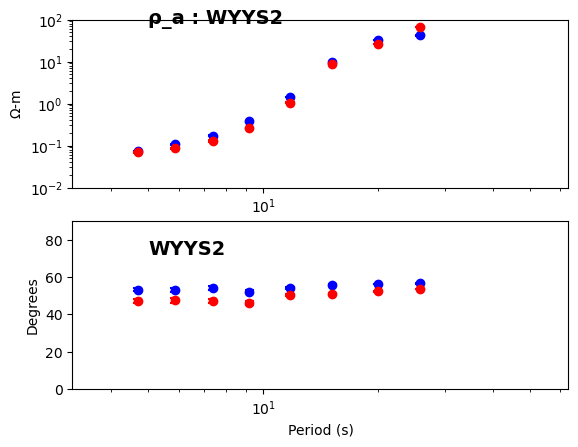

24:09:19T20:49:39 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 1
24:09:19T20:49:40 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 1 Successfully
24:09:19T20:49:40 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:49:41 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:49:41 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 102.915872s  (0.009717Hz)
24:09:19T20:49:41 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 85.631182s  (0.011678Hz)
24:09:19T20:49:41 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 6

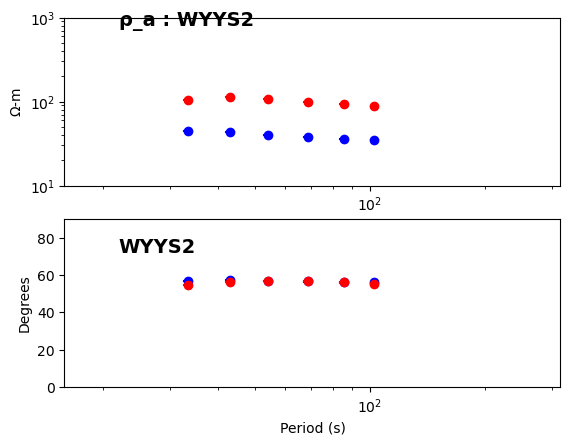

24:09:19T20:49:43 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 2
24:09:19T20:49:43 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 2 Successfully
24:09:19T20:49:43 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:49:44 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:49:44 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 411.663489s  (0.002429Hz)
24:09:19T20:49:44 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 342.524727s  (0.002919Hz)
24:09:19T20:49:44 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 

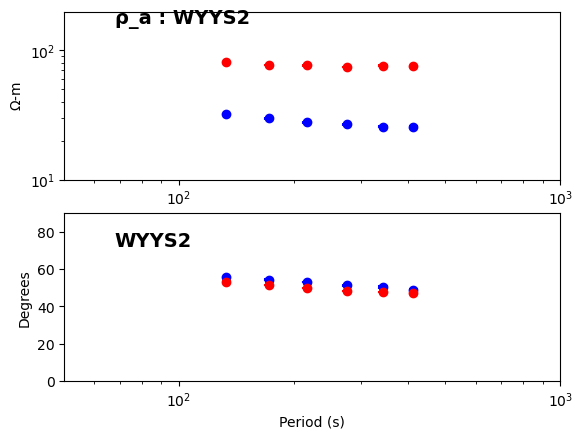

24:09:19T20:49:45 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 3
24:09:19T20:49:45 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 3 Successfully
24:09:19T20:49:46 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:49:46 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:49:46 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 1514.701336s  (0.000660Hz)
24:09:19T20:49:46 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 1042.488956s  (0.000959Hz)
24:09:19T20:49:46 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing ban

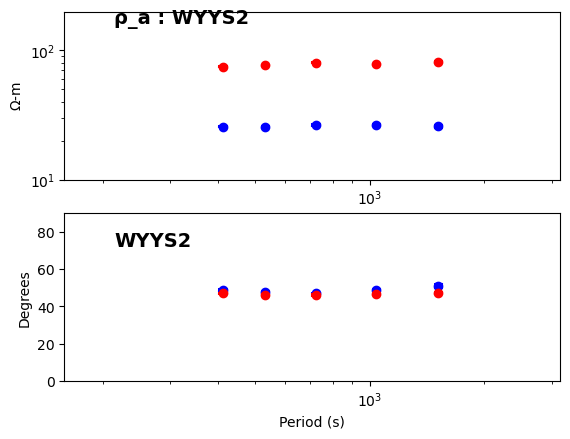

24:09:19T20:49:48 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing ../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5


In [24]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

## There are some issues with these results:

1. The values in Ohmm are too large
2. The short period response does not look correct.

This could point at an issue with the filters, or calibration coefficients.

At the end of this notebook are some cells with debugging steps for investigating the filters.

However, the odd response at high frequency could be due to local noise.

Perhaps remote reference processing may help.

Inspecting the RunSummary, we see that station "MTF20" was operating simultaneously with "WYYS2".

Before invetigating the filters, it would be a good idea to run the same processing but with RR.  

It may also be a good idea to process WYYS3 to see if the same issues are there.

## Re-define the Kernel Dataset to do Remote Reference Processing:

In [25]:
local_station_id = "WYYS2"
reference_station_id = "MTF20"
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id, reference_station_id)
kernel_dataset.drop_runs_shorter_than(10000)
kernel_dataset.mini_summary

24:09:19T20:49:48 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column fc, adding and setting dtype to <class 'bool'>.
24:09:19T20:49:48 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column remote, adding and setting dtype to <class 'bool'>.
24:09:19T20:49:48 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column run_dataarray, adding and setting dtype to <class 'object'>.
24:09:19T20:49:48 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column stft, adding and setting dtype to <class 'object'>.
24:09:19T20:49:48 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column mth5_obj, adding and setting dtype to <class 'object'>.


,survey,station,run,start,end,duration
0,4P,WYYS2,b,2009-07-15 23:39:07+00:00,2009-07-31 19:39:01+00:00,1367994.0
1,4P,MTF20,b,2009-07-15 23:39:07+00:00,2009-07-31 19:39:01+00:00,1367994.0
2,4P,WYYS2,b,2009-07-31 20:47:27+00:00,2009-08-05 19:09:39+00:00,426132.0
3,4P,MTF20,c,2009-07-31 20:47:27+00:00,2009-08-05 19:09:39+00:00,426132.0
4,4P,WYYS2,c,2009-08-05 19:49:51+00:00,2009-08-13 00:00:00+00:00,619809.0
5,4P,MTF20,c,2009-08-05 19:49:51+00:00,2009-08-13 00:00:00+00:00,619809.0


In [26]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset)

24:09:19T20:49:48 | INFO | line:108 |aurora.config.config_creator | determine_band_specification_style | Bands not defined; setting to EMTF BANDS_DEFAULT_FILE


In [27]:
for decimation in config.decimations:
    decimation.window.type = "hamming"

24:09:19T20:49:48 | INFO | line:277 |aurora.pipelines.transfer_function_kernel | show_processing_summary | Processing Summary Dataframe:
24:09:19T20:49:48 | INFO | line:278 |aurora.pipelines.transfer_function_kernel | show_processing_summary | 
     duration  has_data  n_samples run station survey       run_hdf5_reference   station_hdf5_reference     fc  remote  stft mth5_obj dec_level  dec_factor  sample_rate  window_duration  num_samples_window  num_samples  num_stft_windows
0   1367994.0      True    2400661   b   MTF20     4P  <HDF5 object reference>  <HDF5 object reference>  False    True  None     None         0         1.0     1.000000            128.0                 128    1367994.0           14249.0
1   1367994.0      True    2400661   b   MTF20     4P  <HDF5 object reference>  <HDF5 object reference>  False    True  None     None         1         4.0     0.250000            512.0                 128     341998.0            3562.0
2   1367994.0      True    2400661   b   MTF

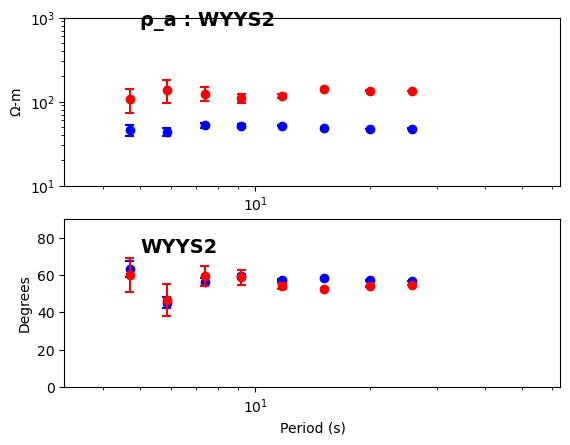

24:09:19T20:50:08 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 1
24:09:19T20:50:09 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 1 Successfully
24:09:19T20:50:09 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:10 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:10 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:11 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:11 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_c

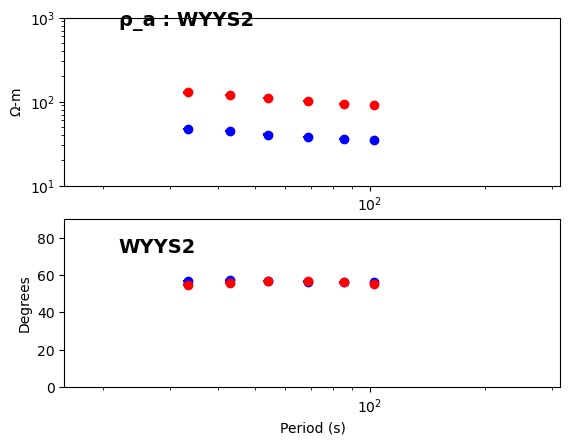

24:09:19T20:50:14 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 2
24:09:19T20:50:14 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 2 Successfully
24:09:19T20:50:14 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:15 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:15 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:16 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:16 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_c

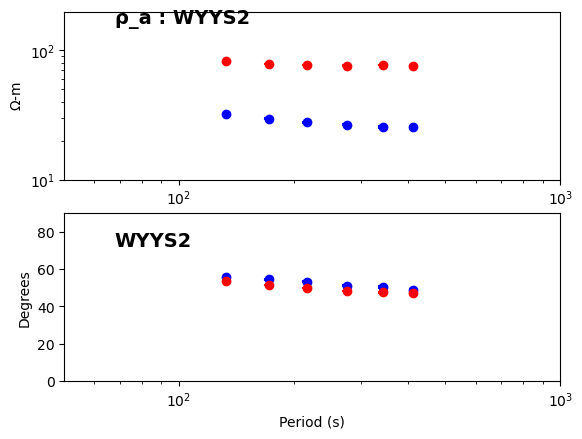

24:09:19T20:50:18 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 3
24:09:19T20:50:18 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 3 Successfully
24:09:19T20:50:18 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:19 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:19 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:20 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:20 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_c

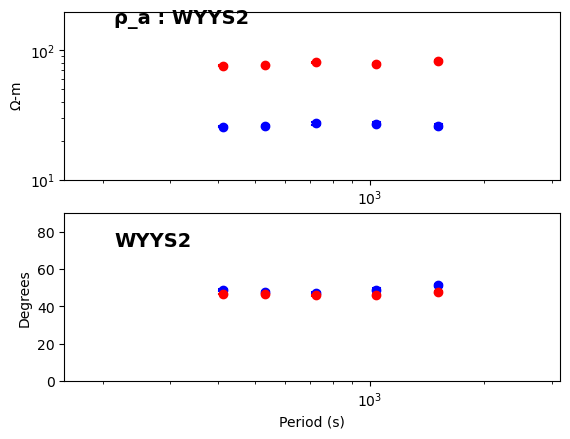

24:09:19T20:50:22 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing ../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5
24:09:19T20:50:23 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing ../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5


In [28]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

Wow! That's a big improvement with regard to wacky values at short period.

## Editted Sept 2024:
 Below are some cells about debugging issues with incorrect scale factors.  At the 2022 short course the resultant curves for yellowstone were smooth but had unrealisitc amplitudes.  There are some tools in aurora to allow the user to apply an ansatz scale factor when processing and those were demonstrated in this notebook around here.  Since the first workshop, significant progress has been made on handling the filters in the Earthscope database, as well as updates to the metadata itself.  There now does not appear to be an unrealistic amplitude.

Following the steps below we obtained results much closer to the published values.  

The shape of the curves agrees with the published values, and the amplitudes were only a little high.
This suggests that we fixed any issues with filters, calibration and missing scale factors.

#### What about the scale factor issue?
Anticipating that the ability to scale data may be relevant to debugging, the KernelDataset provides an interface for ad-hoc (frequency independent) scale factors.

This is a dictionary, packed with each _Run_, for example:

In [29]:
# kernel_dataset.df.iloc[0].channel_scale_factors

In [30]:
# # We can grab a copy of this dictionary:
# scale_factor = kernel_dataset.df.iloc[0].channel_scale_factors

# # And tweak it
# scale_factor["ex"] /= 700
# scale_factor["ey"] /= 700
# scale_factor

In [31]:
# local_station_id = "WYYS2"
# reference_station_id = "MTF20"
# kernel_dataset = KernelDataset()
# kernel_dataset.from_run_summary(run_summary, local_station_id, reference_station_id)
# kernel_dataset.drop_runs_shorter_than(10000)
# kernel_dataset.mini_summary

In [32]:
# # And assign to the dataframe
# kernel_dataset.df.channel_scale_factors = len(kernel_dataset.df) * [scale_factor]
# kernel_dataset.df

In [33]:
# ## Rinse and repeat
# - regenerate the processing configuration
# - call process_mth5
# cc = ConfigCreator()
# config = cc.create_from_kernel_dataset(kernel_dataset)
# for decimation in config.decimations:
#     print(decimation.estimator.engine)
#     decimation.window.type = "hamming"

In [34]:
# show_plot = True
# tf_cls = process_mth5(config,
#                     kernel_dataset,
#                     units="MT",
#                     show_plot=show_plot,
#                     z_file_path=None,
#                 )

## Below: Same exercise but for WYYS3 (paired with MTC20)

## Re-define the Kernel Dataset:

In [35]:
local_station_id = "WYYS3"
reference_station_id = None# "MTC20"
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id, reference_station_id)
kernel_dataset.drop_runs_shorter_than(10000)
kernel_dataset.mini_summary

24:09:19T20:50:23 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column fc, adding and setting dtype to <class 'bool'>.
24:09:19T20:50:23 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column remote, adding and setting dtype to <class 'bool'>.
24:09:19T20:50:23 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column run_dataarray, adding and setting dtype to <class 'object'>.
24:09:19T20:50:23 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column stft, adding and setting dtype to <class 'object'>.
24:09:19T20:50:23 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column mth5_obj, adding and setting dtype to <class 'object'>.


,survey,station,run,start,end,duration
0,4P,WYYS3,c,2009-08-20 01:55:41+00:00,2009-08-28 17:23:45+00:00,746884.0
1,4P,WYYS3,d,2009-08-28 18:24:55+00:00,2009-09-09 20:39:00+00:00,1044845.0


In [36]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset)

24:09:19T20:50:23 | INFO | line:108 |aurora.config.config_creator | determine_band_specification_style | Bands not defined; setting to EMTF BANDS_DEFAULT_FILE


In [37]:
for decimation in config.decimations:
    decimation.estimator.engine = "RME"
    decimation.window.type = "hamming"

24:09:19T20:50:23 | INFO | line:277 |aurora.pipelines.transfer_function_kernel | show_processing_summary | Processing Summary Dataframe:
24:09:19T20:50:23 | INFO | line:278 |aurora.pipelines.transfer_function_kernel | show_processing_summary | 
    duration  has_data  n_samples run station survey       run_hdf5_reference   station_hdf5_reference     fc  remote  stft mth5_obj dec_level  dec_factor  sample_rate  window_duration  num_samples_window  num_samples  num_stft_windows
0   746884.0      True     746885   c   WYYS3     4P  <HDF5 object reference>  <HDF5 object reference>  False   False  None     None         0         1.0     1.000000            128.0                 128     746884.0            7779.0
1   746884.0      True     746885   c   WYYS3     4P  <HDF5 object reference>  <HDF5 object reference>  False   False  None     None         1         4.0     0.250000            512.0                 128     186721.0            1944.0
2   746884.0      True     746885   c   WYYS3  

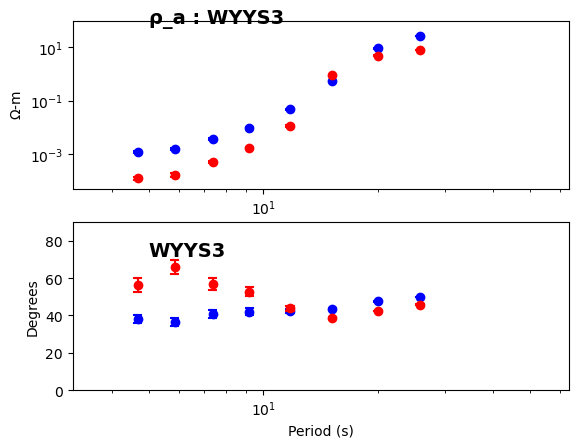

24:09:19T20:50:31 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 1
24:09:19T20:50:31 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 1 Successfully
24:09:19T20:50:32 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:32 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:32 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 102.915872s  (0.009717Hz)
24:09:19T20:50:33 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 85.631182s  (0.011678Hz)
24:09:19T20:50:33 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 6

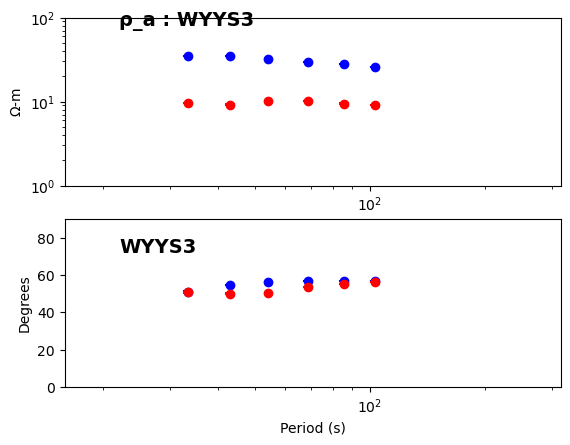

24:09:19T20:50:34 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 2
24:09:19T20:50:34 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 2 Successfully
24:09:19T20:50:35 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:35 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:35 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 411.663489s  (0.002429Hz)
24:09:19T20:50:35 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 342.524727s  (0.002919Hz)
24:09:19T20:50:35 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 

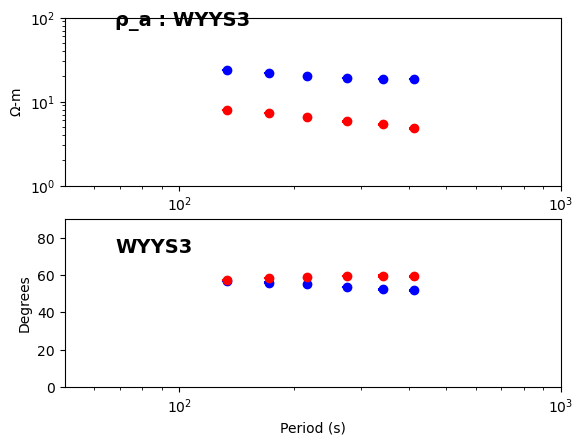

24:09:19T20:50:36 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 3
24:09:19T20:50:36 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 3 Successfully
24:09:19T20:50:37 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:37 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:37 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 1514.701336s  (0.000660Hz)
24:09:19T20:50:37 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing band 1042.488956s  (0.000959Hz)
24:09:19T20:50:37 | INFO | line:35 |aurora.time_series.frequency_band_helpers | get_band_for_tf_estimate | Processing ban

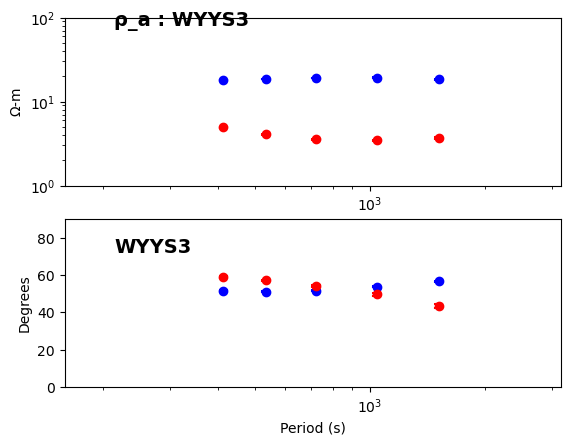

24:09:19T20:50:39 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing ../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5


In [38]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

Same story as WYSS2.  Here we see WYSS3 has extreme bias at short period, and the same scale factor seems to be present.

## Add RR Processing

In [39]:
local_station_id = "WYYS3"
reference_station_id = "MTC20"
kernel_dataset = KernelDataset()
kernel_dataset.from_run_summary(run_summary, local_station_id, reference_station_id)
kernel_dataset.drop_runs_shorter_than(10000)
kernel_dataset.mini_summary

24:09:19T20:50:39 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column fc, adding and setting dtype to <class 'bool'>.
24:09:19T20:50:39 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column remote, adding and setting dtype to <class 'bool'>.
24:09:19T20:50:39 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column run_dataarray, adding and setting dtype to <class 'object'>.
24:09:19T20:50:39 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column stft, adding and setting dtype to <class 'object'>.
24:09:19T20:50:39 | INFO | line:250 |mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column mth5_obj, adding and setting dtype to <class 'object'>.


,survey,station,run,start,end,duration
0,4P,WYYS3,c,2009-08-23 01:33:26+00:00,2009-08-28 17:23:45+00:00,489019.0
1,4P,MTC20,b,2009-08-23 01:33:26+00:00,2009-08-28 17:23:45+00:00,489019.0
2,4P,WYYS3,d,2009-08-28 18:24:55+00:00,2009-09-01 18:50:07+00:00,347112.0
3,4P,MTC20,b,2009-08-28 18:24:55+00:00,2009-09-01 18:50:07+00:00,347112.0
4,4P,WYYS3,d,2009-09-01 19:06:56+00:00,2009-09-09 20:39:00+00:00,696724.0
5,4P,MTC20,c,2009-09-01 19:06:56+00:00,2009-09-09 20:39:00+00:00,696724.0


In [40]:
# Apply emprical scale factor (no longer used in 2024)
# kernel_dataset.df.channel_scale_factors = len(kernel_dataset.df) * [scale_factor]
kernel_dataset.df

,channel_scale_factors,duration,end,has_data,input_channels,mth5_path,n_samples,output_channels,run,sample_rate,start,station,survey,run_hdf5_reference,station_hdf5_reference,fc,remote,run_dataarray,stft,mth5_obj
0,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",489019.0,2009-08-28 17:23:45+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,746885,"[ex, ey, hz]",c,1.0,2009-08-23 01:33:26+00:00,WYYS3,4P,<HDF5 object reference>,<HDF5 object reference>,False,False,None,None,None
1,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",489019.0,2009-08-28 17:23:45+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,839802,"[ex, ey, hz]",b,1.0,2009-08-23 01:33:26+00:00,MTC20,4P,<HDF5 object reference>,<HDF5 object reference>,False,True,None,None,None
2,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",347112.0,2009-09-01 18:50:07+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,1044846,"[ex, ey, hz]",d,1.0,2009-08-28 18:24:55+00:00,WYYS3,4P,<HDF5 object reference>,<HDF5 object reference>,False,False,None,None,None
3,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",347112.0,2009-09-01 18:50:07+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,839802,"[ex, ey, hz]",b,1.0,2009-08-28 18:24:55+00:00,MTC20,4P,<HDF5 object reference>,<HDF5 object reference>,False,True,None,None,None
4,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",696724.0,2009-09-09 20:39:00+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,1044846,"[ex, ey, hz]",d,1.0,2009-09-01 19:06:56+00:00,WYYS3,4P,<HDF5 object reference>,<HDF5 object reference>,False,False,None,None,None
5,"{'ex': 1.0, 'ey': 1.0, 'hx': 1.0, 'hy': 1.0, '...",696724.0,2009-09-09 20:39:00+00:00,True,"[hx, hy]",../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5,967985,"[ex, ey, hz]",c,1.0,2009-09-01 19:06:56+00:00,MTC20,4P,<HDF5 object reference>,<HDF5 object reference>,False,True,None,None,None


Then regenerate the processing configuration:

In [41]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(kernel_dataset)
for decimation in config.decimations:
    decimation.estimator.engine = "RME_RR"
    decimation.window.type = "hamming"

24:09:19T20:50:39 | INFO | line:108 |aurora.config.config_creator | determine_band_specification_style | Bands not defined; setting to EMTF BANDS_DEFAULT_FILE


And re-process the data:

24:09:19T20:50:39 | INFO | line:277 |aurora.pipelines.transfer_function_kernel | show_processing_summary | Processing Summary Dataframe:
24:09:19T20:50:39 | INFO | line:278 |aurora.pipelines.transfer_function_kernel | show_processing_summary | 
    duration  has_data  n_samples run station survey       run_hdf5_reference   station_hdf5_reference     fc  remote  stft mth5_obj dec_level  dec_factor  sample_rate  window_duration  num_samples_window  num_samples  num_stft_windows
0   489019.0      True     839802   b   MTC20     4P  <HDF5 object reference>  <HDF5 object reference>  False    True  None     None         0         1.0     1.000000            128.0                 128     489019.0            5093.0
1   489019.0      True     839802   b   MTC20     4P  <HDF5 object reference>  <HDF5 object reference>  False    True  None     None         1         4.0     0.250000            512.0                 128     122254.0            1273.0
2   489019.0      True     839802   b   MTC20  

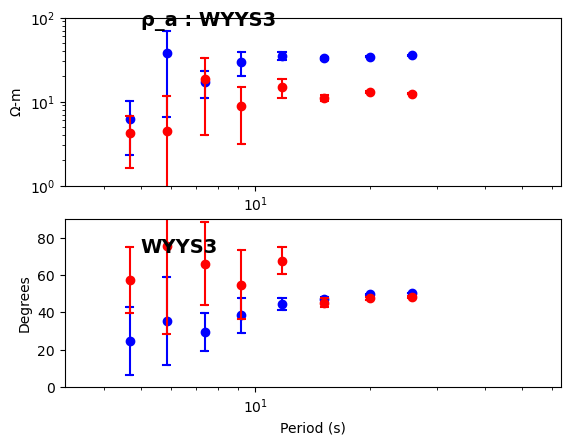

24:09:19T20:50:54 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 1
24:09:19T20:50:54 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 1 Successfully
24:09:19T20:50:55 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:55 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:56 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:56 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:50:57 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_c

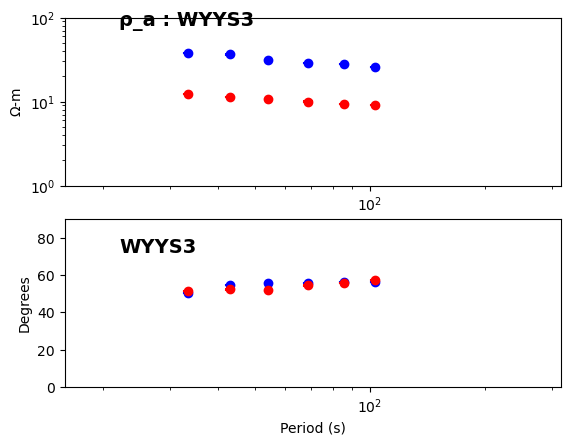

24:09:19T20:50:59 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 2
24:09:19T20:50:59 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 2 Successfully
24:09:19T20:51:00 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:51:00 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:51:00 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:51:01 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:51:01 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_c

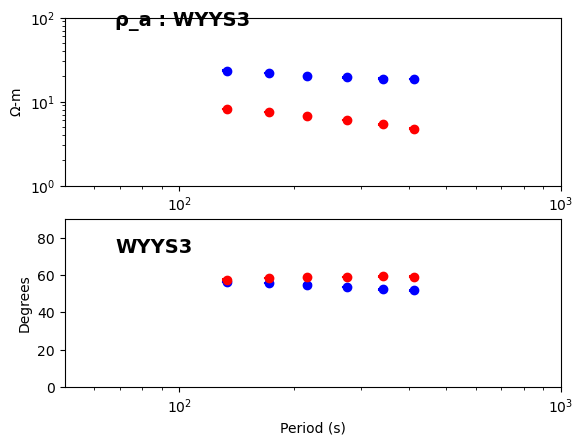

24:09:19T20:51:03 | INFO | line:124 |aurora.pipelines.transfer_function_kernel | update_dataset_df | DECIMATION LEVEL 3
24:09:19T20:51:03 | INFO | line:143 |aurora.pipelines.transfer_function_kernel | update_dataset_df | Dataset Dataframe Updated for decimation level 3 Successfully
24:09:19T20:51:04 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:51:04 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:51:04 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:51:05 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_config.save_fc =  False
24:09:19T20:51:05 | INFO | line:354 |aurora.pipelines.process_mth5 | save_fourier_coefficients | Skip saving FCs. dec_level_c

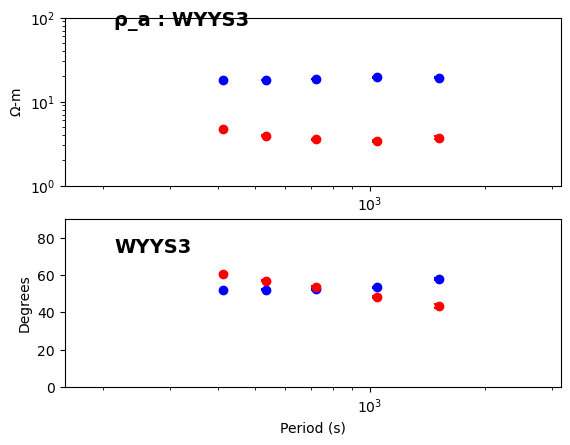

24:09:19T20:51:07 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing ../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5
24:09:19T20:51:08 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing ../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5


In [42]:
show_plot = True
tf_cls = process_mth5(config,
                    kernel_dataset,
                    units="MT",
                    show_plot=show_plot,
                    z_file_path=None,
                )

In [43]:
mth5_object.close_mth5()

24:09:19T20:51:08 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing ../mth5/4P_WYYS2_MTF20_WYYS3_MTC20.h5


# Reviewing Filters (Debugging)

In [44]:
mth5_object = initialize_mth5(mth5_path)
# mth5_object

## To access a particular channel from a station-run:

In [45]:
station_id = "WYYS2" #"MTC20" # "WYYS2"
run_id = "b" # "002"
survey_id = "4P" # was "Kansas_2017_Long_Period"
ex = mth5_object.get_channel(station_id, run_id, "ex", survey=survey_id)

To look at the filter info:

In [46]:
ex.metadata.filter

{
    "filtered": {
        "applied": [
            true,
            true,
            true,
            true,
            true,
            true
        ],
        "name": [
            "electric_si_units",
            "electric_dipole_100.000",
            "electric_butterworth_low_pass",
            "electric_butterworth_high_pass_6000",
            "electric_analog_to_digital",
            "electric_time_offset"
        ]
    }
}

To access the time series (and its metadata):

In [47]:
ex_ts = ex.to_channel_ts()

In [48]:
ex_ts

Channel Summary:
	Survey:       4P
	Station:      WYYS2
	Run:          b
	Channel Type: Electric
	Component:    ex
	Sample Rate:  1.0
	Start:        2009-07-15T23:39:07+00:00
	End:          2009-08-05T19:09:39+00:00
	N Samples:    1798233

In [49]:
ex_ts.channel_metadata

{
    "electric": {
        "channel_number": 0,
        "comments": "run_ids: [c,b,a]",
        "component": "ex",
        "data_quality.rating.value": 0,
        "dipole_length": 100.0,
        "filter.applied": [
            true,
            true,
            true,
            true,
            true,
            true
        ],
        "filter.name": [
            "electric_si_units",
            "electric_dipole_100.000",
            "electric_butterworth_low_pass",
            "electric_butterworth_high_pass_6000",
            "electric_analog_to_digital",
            "electric_time_offset"
        ],
        "hdf5_reference": "<HDF5 object reference>",
        "measurement_azimuth": 12.5,
        "measurement_tilt": 0.0,
        "mth5_type": "Electric",
        "negative.elevation": 2392.3,
        "negative.id": "08059",
        "negative.latitude": 44.39635,
        "negative.longitude": -110.577,
        "negative.manufacturer": "Oregon State University/Adam Schultz and Prasa

More information about channel specific filters

In [50]:
ex_ts.channel_response

Filters Included:
coefficient_filter:
	calibration_date = 1980-01-01
	comments = practical to SI unit conversion
	gain = 1e-06
	name = electric_si_units
	type = coefficient
	units_in = mV/km
	units_out = V/m
--------------------
coefficient_filter:
	calibration_date = 1980-01-01
	comments = electric dipole for electric field
	gain = 100.0
	name = electric_dipole_100.000
	type = coefficient
	units_in = V/m
	units_out = V
--------------------
pole_zero_filter:
	calibration_date = 1980-01-01
	comments = NIMS electric field 5 pole Butterworth 0.5 low pass (analog)
	gain = 1.0
	name = electric_butterworth_low_pass
	normalization_factor = 313383.493219835
	poles = [ -3.883009+11.951875j  -3.883009-11.951875j -10.166194 +7.386513j
 -10.166194 -7.386513j -12.566371 +0.j      ]
	type = zpk
	units_in = V
	units_out = V
	zeros = []
--------------------
pole_zero_filter:
	calibration_date = 1980-01-01
	comments = NIMS electric field 1 pole Butterworth high pass (analog)
	gain = 1.0
	name = electri

To access another channel:

In [51]:
hx = mth5_object.get_channel("WYYS2", "b", "hx", survey=survey_id)  # Kansas_2017_Long_Period")

In [52]:
hx.metadata.filter

{
    "filtered": {
        "applied": [
            true,
            true,
            true
        ],
        "name": [
            "magnetic_butterworth_low_pass",
            "magnetic_analog_to_digital",
            "hx_time_offset"
        ]
    }
}

In [53]:
hx_ts = hx.to_channel_ts()

In [54]:
hx_ts.channel_metadata

{
    "magnetic": {
        "channel_number": 0,
        "comments": "run_ids: [c,b,a]",
        "component": "hx",
        "data_quality.rating.value": 0,
        "filter.applied": [
            true,
            true,
            true
        ],
        "filter.name": [
            "magnetic_butterworth_low_pass",
            "magnetic_analog_to_digital",
            "hx_time_offset"
        ],
        "hdf5_reference": "<HDF5 object reference>",
        "location.elevation": 2392.3,
        "location.latitude": 44.39635,
        "location.longitude": -110.577,
        "measurement_azimuth": 12.5,
        "measurement_tilt": 0.0,
        "mth5_type": "Magnetic",
        "sample_rate": 1.0,
        "sensor.id": "2612-08",
        "sensor.manufacturer": "Barry Narod",
        "sensor.model": "fluxgate NIMS",
        "sensor.name": "NIMS",
        "sensor.type": "Magnetometer",
        "time_period.end": "2009-08-05T19:09:39+00:00",
        "time_period.start": "2009-07-15T23:39:07+00:0

In [55]:
survey = mth5_object.get_survey(survey_id)

In [56]:
survey.filters_group

/Experiment/Surveys/4P/Filters:
    |- Group: coefficient
    ---------------------
        |- Group: electric_analog_to_digital
        ------------------------------------
        |- Group: electric_dipole_100.000
        ---------------------------------
        |- Group: electric_si_units
        ---------------------------
        |- Group: magnetic_analog_to_digital
        ------------------------------------
    |- Group: fap
    -------------
    |- Group: fir
    -------------
    |- Group: time_delay
    --------------------
        |- Group: electric_time_offset
        ------------------------------
        |- Group: hx_time_offset
        ------------------------
        |- Group: hy_time_offset
        ------------------------
        |- Group: hz_time_offset
        ------------------------
    |- Group: zpk
    -------------
        |- Group: electric_butterworth_high_pass_6000
        ---------------------------------------------
            --> Dataset: poles
       

In [57]:

survey.filters_group.coefficient_group

/Experiment/Surveys/4P/Filters/coefficient:
    |- Group: electric_analog_to_digital
    ------------------------------------
    |- Group: electric_dipole_100.000
    ---------------------------------
    |- Group: electric_si_units
    ---------------------------
    |- Group: magnetic_analog_to_digital
    ------------------------------------

In [58]:
survey.filters_group.coefficient_group.filter_dict

{'electric_analog_to_digital': {'type': 'coefficient',
  'hdf5_ref': <HDF5 object reference>},
 'electric_dipole_100.000': {'type': 'coefficient',
  'hdf5_ref': <HDF5 object reference>},
 'electric_si_units': {'type': 'coefficient',
  'hdf5_ref': <HDF5 object reference>},
 'magnetic_analog_to_digital': {'type': 'coefficient',
  'hdf5_ref': <HDF5 object reference>}}

In [59]:
tmp = survey.filters_group.coefficient_group.filter_dict["electric_dipole_100.000"]

In [60]:
print(type(tmp))
tmp

<class 'dict'>


{'type': 'coefficient', 'hdf5_ref': <HDF5 object reference>}

In [61]:
tmp.keys()

dict_keys(['type', 'hdf5_ref'])

In [62]:
tmp["type"]

'coefficient'

In [63]:
tmp["hdf5_ref"]

<HDF5 object reference>